# Pokemon Analysis

### Table of Contents
1. [Analysis](##analysis)
2. [Generation](##generation)
3. [Type](##type)
4. [Height & Weight](##height-&-weight)
5. [Gender Encounter Rate](##gender-encounter-rate)
6. [Get Rate](##get-rate)
7. [Stats](#stats-on-pokemon)

### Summary of Analysis


## Analysis

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import os

In [44]:
# Create a dataframe from the csv file saved in the data folder
df = pd.read_csv('data/Pokedex_Ver_SV2.csv')

# Create a dataframe with the unique number of pokemon (merging forms)
pokedex = df.drop_duplicates(subset=['Original_Name'], keep='first').copy()

# Count the number of unique pokemon
count_pokedex = pokedex['Original_Name'].count()

# Create a dataframe with all of the pokemon
national_dex = df.copy()

# Count the number of pokemon in national_dex
count_national_dex = national_dex['Original_Name'].count()

# pokedex.head()
# national_dex.head()

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
0,1,1_0,Bulbasaur,Bulbasaur,1,0.7,6.9,Grass,Poison,Overgrow,...,65,65,45,318,0,0,0,1,0,0
1,2,2_0,Ivysaur,Ivysaur,1,1.0,13.0,Grass,Poison,Overgrow,...,80,80,60,405,0,0,0,1,1,0
2,3,3_0,Venusaur,Venusaur,1,2.0,100.0,Grass,Poison,Overgrow,...,100,100,80,525,0,0,0,2,1,0
3,3,3_1,Venusaur,Mega Venusaur,1,2.4,155.5,Grass,Poison,Thick Fat,...,122,120,80,625,0,0,0,2,1,0
4,4,4_0,Charmander,Charmander,1,0.6,8.5,Fire,NaN,Blaze,...,60,50,65,309,0,0,0,0,0,1


## Generation
* Mode
* Bar Chart of each generation
* ~~Comparision of same type of pokemon across generations (t-test); Create a dataframe that has the 1 generation and the last generation released~~

## Type
* Percentage, frequencies, bar chart - How many are in each type?
* Create column to combine type 1 and type 2 columns (alphabetical order on combination)
* Bar chart of each type combination
* Focus on sections of the data that are interesting
* Which combinations are missing or not well represented?
* Which combinations are the most frequent?

## Height & Weight
* Scatterplot, with regression line (correlation)
* Point out outliers if they exist
* Using gender as a grouping variable for scatterplot

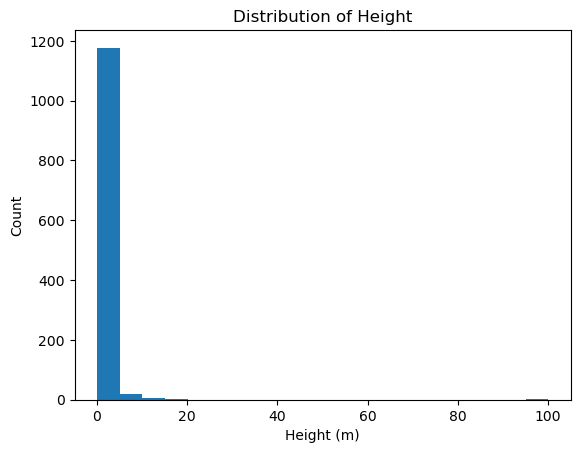

In [11]:
# Distribution of Height
plt.hist(national_dex['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

[Text(0.5, 0, 'Height (m)'), Text(0.5, 1.0, 'Box Plot of Height')]

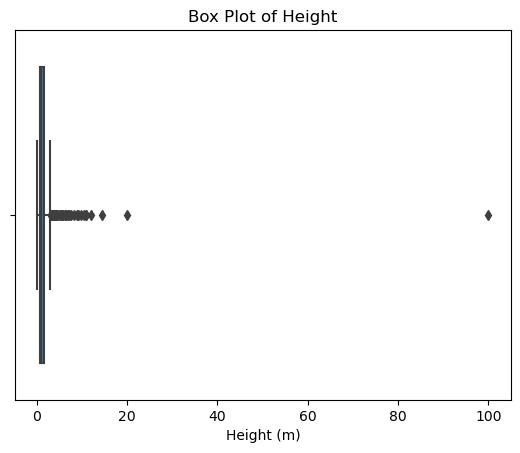

In [22]:
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex['Height'])
height_boxplot.set(xlabel='Height (m)', title='Box Plot of Height')

In [30]:
# There appears to be one clear outlier on height
# Create a dataframe that excludes the outlier
national_dex_no_outlier = national_dex[national_dex['Height'] < 90]
whats_the_new_max_height = national_dex_no_outlier['Height'].max()
# whats_the_new_max_height

# Height is positively skewed so median would be a better measure of central tendency
# Median height of pokemon
median_height = national_dex_no_outlier['Height'].median()
print(f"Median Height: {median_height}")



Median Height: 1.0


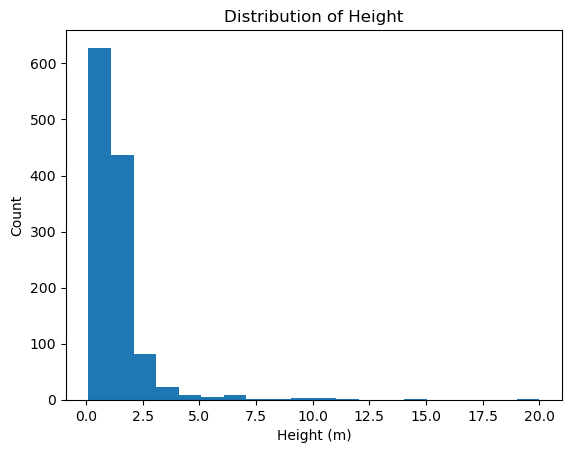

In [31]:
# Revised distribution of Height
plt.hist(national_dex_no_outlier['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

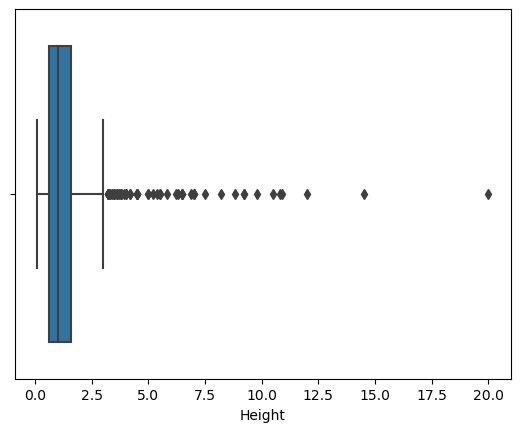

In [32]:
# Still skewed, but better!
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex_no_outlier['Height'])

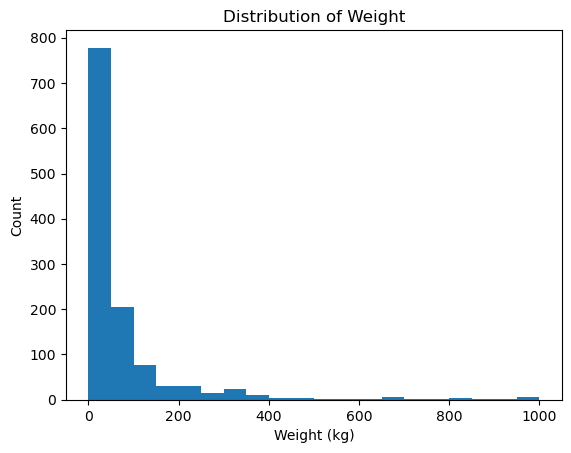

In [33]:
# Distribution of Weight
plt.hist(national_dex_no_outlier['Weight'], bins=20)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

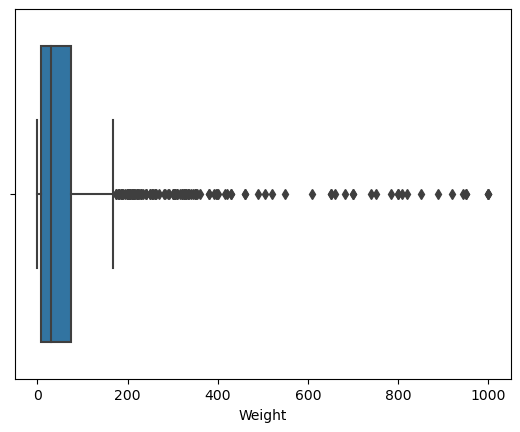

In [36]:
# Box plot of Weight
weight_boxplot = sns.boxplot(x=national_dex_no_outlier['Weight'])

# There are some potential outliers, but they are all near each other so it is reasonable to keep them

In [34]:
# Weight is positively skewed so median would be a better measure of central tendency
# Median weight of pokemon
median_weight = national_dex_no_outlier['Weight'].median()
print(f"Median Weight: {median_weight}")

Median Weight: 30.0


In [37]:
# Height and Weight is skewed, so Spearman's rho would be better than Pearsons
corr, pval = spearmanr(national_dex_no_outlier['Height'], national_dex_no_outlier['Weight'])
print(f"Spearman's rho: {corr}")
print(f"P-value: {pval}")

# There is a strong positive correlation between height and weight

Spearman's rho: 0.844481710264344
P-value: 0.0


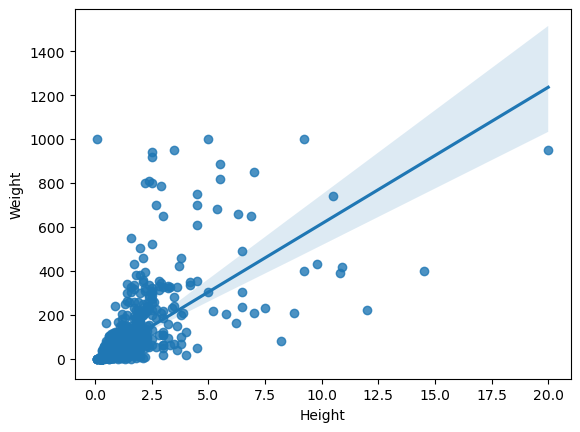

In [39]:
# Create a scatterplot of height vs weight
height_by_weight = sns.regplot(x='Height', y='Weight', data=national_dex_no_outlier)

## Gender Encounter Rate
* ~~Overlapping Normal plots?~~
* Check if the unique values are the same for gender encounter
* Add photos for the different encounter rates

In [80]:
# What are the unique combinations of Gender_Male, Gender_Female_, and Gender_Unknown?

# Select only the gender columns
gender_col = ["Gender_Male", "Gender_Female", "Gender_Unknown"]
unique_gender_rate = national_dex.loc[:, gender_col].copy()

# Sort the columns
unique_gender_rate = unique_gender_rate.sort_values(by=["Gender_Female"])

# Create a column that concatenates the gender rates
unique_gender_rate['Gender_Combination'] = unique_gender_rate.apply(lambda row: "M: " + str(row["Gender_Male"]) + ", F: " + str(row["Gender_Female"]) + ", U: " + str(row["Gender_Unknown"]), axis=1)

# How many unique combinations of the Gender_Combination column
num_unique_gender_rate = unique_gender_rate.groupby('Gender_Combination').size()

num_unique_gender_rate

Gender_Combination
M: 0.0, F: 0.0, U: 100.0    196
M: 0.0, F: 100.0, U: 0.0     46
M: 100.0, F: 0.0, U: 0.0     37
M: 12.5, F: 87.5, U: 0.0      2
M: 25.0, F: 75.0, U: 0.0     31
M: 50.0, F: 50.0, U: 0.0    724
M: 75.0, F: 25.0, U: 0.0     22
M: 87.5, F: 12.5, U: 0.0    145
dtype: int64

## Get Rate
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest catch rates?

## Stats on Pokemon
* HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest for each?
* Correlation between stats